# Topic modeling with LDA

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

At the end of preprocessing/edmunds_reviews.ipynb I have checked and removed rows containg null values, but it seems that the final "to_csv" adds 900 null values. So these values should be removed again.

In [19]:
cars = pd.read_csv("../data/final_edmunds_reviews.csv")
cars.dropna(subset=["Review"], inplace=True)
cars.head(2)

,Vehicle_Title,Review_Title,Review,Rating
0,2007 Volkswagen New Beetle Convertible 2.5 2dr...,"New Beetle- Holds up well & Fun to Drive, but ...",i have beetle convertible 45 year andhave over...,4.5
1,2007 Volkswagen New Beetle Convertible 2.5 PZE...,Quality Review,we bought car new 2007 generally satisfied mec...,4.5


In [20]:
cars.isna().sum()

Vehicle_Title    0
Review_Title     0
Review           0
Rating           0
dtype: int64

### Data visualization

#### Count the occurrences of each unique rating value

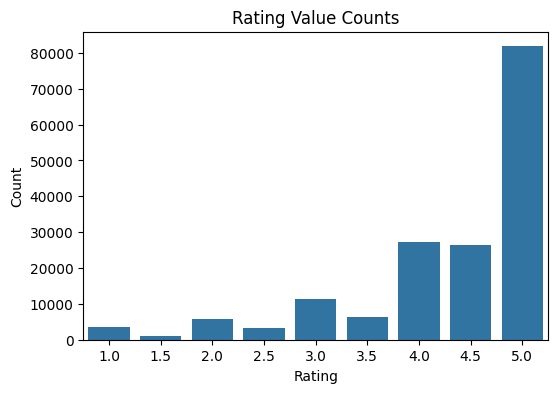

In [21]:
rating_counts = cars["Rating"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Rating Value Counts")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Most common words

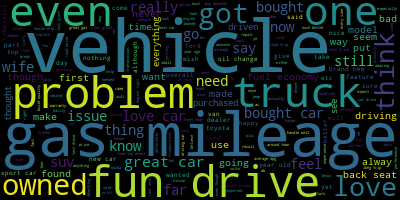

In [25]:
all_reviews = ",".join(list(cars["Review"].values))
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color="yellow")
wordcloud.generate(all_reviews)
wordcloud.to_image()